# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 3: *FourierConvolution*
Filter an image by using the Fourier transform 
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageL, plotImageF, createImageF
from FourierUtilities import computeCoefficients, reconstruction, computePowerfromCoefficients
from ImageOperatorsUtilities import imageLogF

# Iteration
from timeit import itertools

### Parameters:
    imageName = Input image name
    kernelSize = Size of the kernel

In [2]:
imageName = "Eye.png"
kernelSize = 9

### Read and show input image

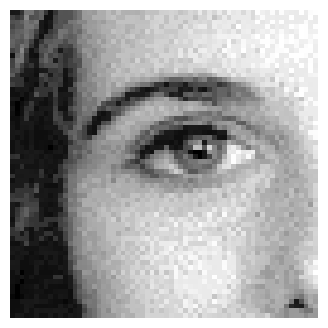

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter3/Input/")
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Create flat kernel image

In [4]:
kernelImage = createImageF(kernelSize, kernelSize)

# Set the pixels of a flat kernel
for x,y in itertools.product(range(0, kernelSize), range(0, kernelSize)):
    kernelImage[y, x] = 255.0   

### Pad and flip the kernel

In [5]:
# Padding size
widthPad, heightPad = width+kernelSize-1, height+kernelSize-1  

templatePadFlip = createImageF(widthPad, heightPad)
for x,y in itertools.product(range(0, kernelSize), range(0, kernelSize)):
    templatePadFlip[y, x] = kernelImage[kernelSize-y-1, kernelSize-x-1]

### Show padded flipped kernel

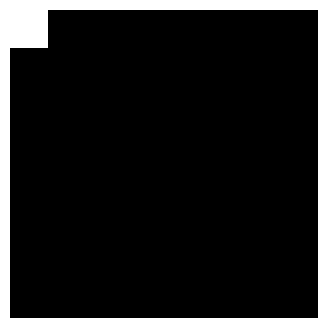

In [6]:
plotImageF(templatePadFlip, figureSize = 4)

### Crete a padded image from the input

In [7]:
# Padding input
inputPad = createImageF(widthPad, heightPad)
for x,y in itertools.product(range(0, width), range(0, height)):
    inputPad[y,x] = inputImage[y,x] 
    

### Compute Fourier coefficients

In [8]:
imageCoeff, maxFrequencyW, maxFrequencyH = computeCoefficients(inputPad)
templateCoeff, _, _ = computeCoefficients(templatePadFlip)


0 / 72  .. 1 / 72  .. 2 / 72  .. 3 / 72  .. 4 / 72  .. 5 / 72  .. 6 / 72  .. 7 / 72  .. 8 / 72  .. 9 / 72  .. 10 / 72  .. 11 / 72  .. 12 / 72  .. 13 / 72  .. 14 / 72  .. 15 / 72  .. 16 / 72  .. 17 / 72  .. 18 / 72  .. 19 / 72  .. 20 / 72  .. 21 / 72  .. 22 / 72  .. 23 / 72  .. 24 / 72  .. 25 / 72  .. 26 / 72  .. 27 / 72  .. 28 / 72  .. 29 / 72  .. 30 / 72  .. 31 / 72  .. 32 / 72  .. 33 / 72  .. 34 / 72  .. 35 / 72  .. 36 / 72  .. 37 / 72  .. 38 / 72  .. 39 / 72  .. 40 / 72  .. 41 / 72  .. 42 / 72  .. 43 / 72  .. 44 / 72  .. 45 / 72  .. 46 / 72  .. 47 / 72  .. 48 / 72  .. 49 / 72  .. 50 / 72  .. 51 / 72  .. 52 / 72  .. 53 / 72  .. 54 / 72  .. 55 / 72  .. 56 / 72  .. 57 / 72  .. 58 / 72  .. 59 / 72  .. 60 / 72  .. 61 / 72  .. 62 / 72  .. 63 / 72  .. 64 / 72  .. 65 / 72  .. 66 / 72  .. 67 / 72  .. 68 / 72  .. 69 / 72  .. 70 / 72  .. 71 / 72  .. 72 / 72  .. 0 / 72  .. 1 / 72  .. 2 / 72  .. 3 / 72  .. 4 / 72  .. 5 / 72  .. 6 / 72  .. 7 / 72  .. 8 / 72  .. 9 / 72  .. 10 / 72  .. 11 / 72  .. 

### Show the log of the power of the input image coefficients

0 / 72  .. 1 / 72  .. 2 / 72  .. 3 / 72  .. 4 / 72  .. 5 / 72  .. 6 / 72  .. 7 / 72  .. 8 / 72  .. 9 / 72  .. 10 / 72  .. 11 / 72  .. 12 / 72  .. 13 / 72  .. 14 / 72  .. 15 / 72  .. 16 / 72  .. 17 / 72  .. 18 / 72  .. 19 / 72  .. 20 / 72  .. 21 / 72  .. 22 / 72  .. 23 / 72  .. 24 / 72  .. 25 / 72  .. 26 / 72  .. 27 / 72  .. 28 / 72  .. 29 / 72  .. 30 / 72  .. 31 / 72  .. 32 / 72  .. 33 / 72  .. 34 / 72  .. 35 / 72  .. 36 / 72  .. 37 / 72  .. 38 / 72  .. 39 / 72  .. 40 / 72  .. 41 / 72  .. 42 / 72  .. 43 / 72  .. 44 / 72  .. 45 / 72  .. 46 / 72  .. 47 / 72  .. 48 / 72  .. 49 / 72  .. 50 / 72  .. 51 / 72  .. 52 / 72  .. 53 / 72  .. 54 / 72  .. 55 / 72  .. 56 / 72  .. 57 / 72  .. 58 / 72  .. 59 / 72  .. 60 / 72  .. 61 / 72  .. 62 / 72  .. 63 / 72  .. 64 / 72  .. 65 / 72  .. 66 / 72  .. 67 / 72  .. 68 / 72  .. 69 / 72  .. 70 / 72  .. 71 / 72  .. 72 / 72  .. 

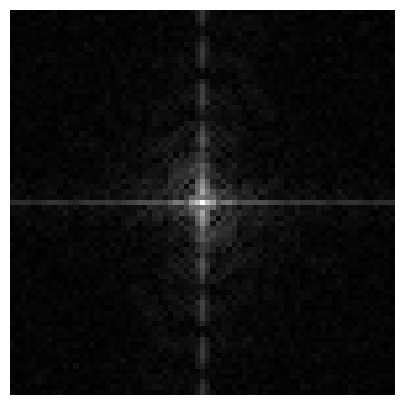

In [9]:
powerImage = computePowerfromCoefficients(imageCoeff)
powerImageLog = imageLogF(powerImage)
plotImageF(powerImageLog)


### Show the log of the power of the kernel image coefficients

0 / 72  .. 1 / 72  .. 2 / 72  .. 3 / 72  .. 4 / 72  .. 5 / 72  .. 6 / 72  .. 7 / 72  .. 8 / 72  .. 9 / 72  .. 10 / 72  .. 11 / 72  .. 12 / 72  .. 13 / 72  .. 14 / 72  .. 15 / 72  .. 16 / 72  .. 17 / 72  .. 18 / 72  .. 19 / 72  .. 20 / 72  .. 21 / 72  .. 22 / 72  .. 23 / 72  .. 24 / 72  .. 25 / 72  .. 26 / 72  .. 27 / 72  .. 28 / 72  .. 29 / 72  .. 30 / 72  .. 31 / 72  .. 32 / 72  .. 33 / 72  .. 34 / 72  .. 35 / 72  .. 36 / 72  .. 37 / 72  .. 38 / 72  .. 39 / 72  .. 40 / 72  .. 41 / 72  .. 42 / 72  .. 43 / 72  .. 44 / 72  .. 45 / 72  .. 46 / 72  .. 47 / 72  .. 48 / 72  .. 49 / 72  .. 50 / 72  .. 51 / 72  .. 52 / 72  .. 53 / 72  .. 54 / 72  .. 55 / 72  .. 56 / 72  .. 57 / 72  .. 58 / 72  .. 59 / 72  .. 60 / 72  .. 61 / 72  .. 62 / 72  .. 63 / 72  .. 64 / 72  .. 65 / 72  .. 66 / 72  .. 67 / 72  .. 68 / 72  .. 69 / 72  .. 70 / 72  .. 71 / 72  .. 72 / 72  .. 

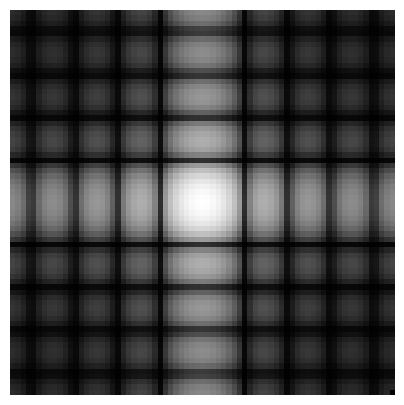

In [10]:
powerTemplate = computePowerfromCoefficients(templateCoeff)
powerTemplateLog = imageLogF(powerTemplate)
plotImageF(powerTemplateLog)

### Frequency domain multiplication

In [11]:
resultCoeff = createImageF(1 + 2 * maxFrequencyW, 1 + 2 * maxFrequencyH , 2)
for kw,kh in itertools.product(range(-maxFrequencyW, maxFrequencyW + 1),         \
                               range(-maxFrequencyH, maxFrequencyH + 1)):
    w = kw + maxFrequencyW 
    h = kh + maxFrequencyH
    
    resultCoeff[h,w][0] = (imageCoeff[h,w][0] * templateCoeff[h,w][0] -           \
                           imageCoeff[h,w][1] * templateCoeff[h,w][1])
    resultCoeff[h,w][1] = (imageCoeff[h,w][1] * templateCoeff[h,w][0] +           \
                           imageCoeff[h,w][0] * templateCoeff[h,w][1])



### Show the power of the multiplication result

0 / 72  .. 1 / 72  .. 2 / 72  .. 3 / 72  .. 4 / 72  .. 5 / 72  .. 6 / 72  .. 7 / 72  .. 8 / 72  .. 9 / 72  .. 10 / 72  .. 11 / 72  .. 12 / 72  .. 13 / 72  .. 14 / 72  .. 15 / 72  .. 16 / 72  .. 17 / 72  .. 18 / 72  .. 19 / 72  .. 20 / 72  .. 21 / 72  .. 22 / 72  .. 23 / 72  .. 24 / 72  .. 25 / 72  .. 26 / 72  .. 27 / 72  .. 28 / 72  .. 29 / 72  .. 30 / 72  .. 31 / 72  .. 32 / 72  .. 33 / 72  .. 34 / 72  .. 35 / 72  .. 36 / 72  .. 37 / 72  .. 38 / 72  .. 39 / 72  .. 40 / 72  .. 41 / 72  .. 42 / 72  .. 43 / 72  .. 44 / 72  .. 45 / 72  .. 46 / 72  .. 47 / 72  .. 48 / 72  .. 49 / 72  .. 50 / 72  .. 51 / 72  .. 52 / 72  .. 53 / 72  .. 54 / 72  .. 55 / 72  .. 56 / 72  .. 57 / 72  .. 58 / 72  .. 59 / 72  .. 60 / 72  .. 61 / 72  .. 62 / 72  .. 63 / 72  .. 64 / 72  .. 65 / 72  .. 66 / 72  .. 67 / 72  .. 68 / 72  .. 69 / 72  .. 70 / 72  .. 71 / 72  .. 72 / 72  .. 

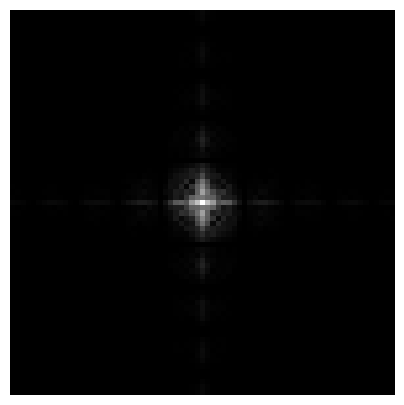

In [12]:
powerResult = computePowerfromCoefficients(resultCoeff)
powerResultLog = imageLogF(powerResult)
plotImageF(powerResultLog)  

### Perform recostruction

In [13]:
outputImage = reconstruction(resultCoeff)

outPad = createImageF(width, height)
halfKernel = int(kernelSize/2)
for x,y in itertools.product(range(0, width), range(0, height)):
    outPad[y,x] = outputImage[y + halfKernel, x + halfKernel] 

0 / 71  .. 1 / 71  .. 2 / 71  .. 3 / 71  .. 4 / 71  .. 5 / 71  .. 6 / 71  .. 7 / 71  .. 8 / 71  .. 9 / 71  .. 10 / 71  .. 11 / 71  .. 12 / 71  .. 13 / 71  .. 14 / 71  .. 15 / 71  .. 16 / 71  .. 17 / 71  .. 18 / 71  .. 19 / 71  .. 20 / 71  .. 21 / 71  .. 22 / 71  .. 23 / 71  .. 24 / 71  .. 25 / 71  .. 26 / 71  .. 27 / 71  .. 28 / 71  .. 29 / 71  .. 30 / 71  .. 31 / 71  .. 32 / 71  .. 33 / 71  .. 34 / 71  .. 35 / 71  .. 36 / 71  .. 37 / 71  .. 38 / 71  .. 39 / 71  .. 40 / 71  .. 41 / 71  .. 42 / 71  .. 43 / 71  .. 44 / 71  .. 45 / 71  .. 46 / 71  .. 47 / 71  .. 48 / 71  .. 49 / 71  .. 50 / 71  .. 51 / 71  .. 52 / 71  .. 53 / 71  .. 54 / 71  .. 55 / 71  .. 56 / 71  .. 57 / 71  .. 58 / 71  .. 59 / 71  .. 60 / 71  .. 61 / 71  .. 62 / 71  .. 63 / 71  .. 64 / 71  .. 65 / 71  .. 66 / 71  .. 67 / 71  .. 68 / 71  .. 69 / 71  .. 70 / 71  .. 71 / 71  .. 

### Show filtered image

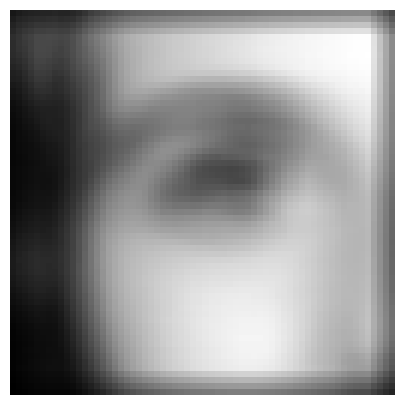

In [14]:
plotImageF(outPad)